In [53]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../src/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import json
import os
from pathlib import Path

In [55]:
import numpy as np
import numpy.matlib

import torch
if torch.cuda.is_available():
    import torch.cuda as t
else:
    import torch as t
    
from   torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from collections import namedtuple

In [56]:
from PIL import Image

In [58]:
import json, os
from pathlib import Path

import experiment.data as exp
import datasets.divahisdb as hisdb
env = exp.Environment()
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

mnist_set = torchvision.datasets.MNIST(str(env.dataset('MNIST')),train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(mnist_set, batch_size=64,
                                          shuffle=True, num_workers=2)


In [59]:
size = 5
X = np.matlib.randn((size,size))

In [60]:
rnd = np.random.RandomState(seed=123123123)
rnd.random_sample()

0.7633579247958588

In [61]:
# for i, data in enumerate(trainloader, 0):
# #     print(i)
#     pass

In [62]:
it_data = iter(trainloader)
inputs, labels = next(it_data)

In [63]:

rot = lambda x, alpha: x + alpha, [-5,5] 
col = lambda x, alpha: x * alpha, [1,5] 


<function <lambda> at 0x7f7076f06048> -1.857862449061737
<function <lambda> at 0x7f7076f06378> 3.8744956219881908
<function <lambda> at 0x7f7076f06048> -1.4044251142525424


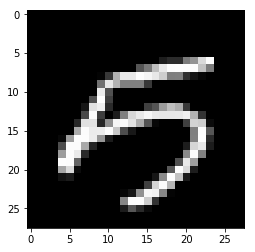

In [64]:
def scale(sample, scale):
    return (scale[1] - scale[0]) * sample + scale[0]

def create_transform_vector(transforms, K):
    rnd = np.random.RandomState()
    return [(T, scale(rnd.random_sample(), alpha_scale)) for T, alpha_scale in transforms]
        
def apply(t_vec, x):
    it = iter(t_vec)
    f, alpha = next(it)
    t_a = f(x, alpha)
    print(f,alpha)
    for f, alpha in it:
        print(f,alpha)
        t_a = f(x, alpha)
    return t_a
#     while it.

t = create_transform_vector([rot, col, rot], 10)
plt.imshow(apply(t,inputs[0,0,...]),'gray')

In [65]:
# Image.inputs[0,0,...]

In [67]:
grad = nn.Conv1d(1,1,kernel_size=3,bias=False)

In [68]:
# grad.weight.data = t.FloatTensor([[[-1,0,1]]])
# grad(Variable(inputs))

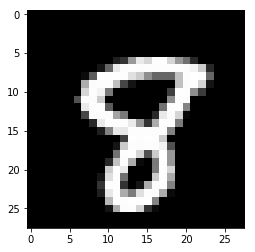

In [69]:
plt.imshow(inputs[10,0],'gray')

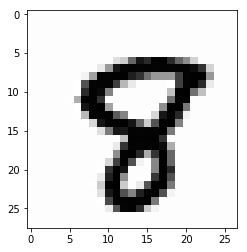

In [70]:
plt.imshow(inputs[10,0,:,1:]-inputs[10,0,:,:-1] * 100,'gray')

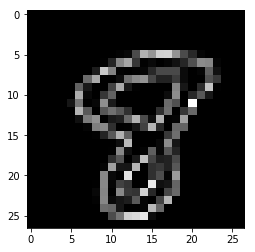

In [71]:
bw = inputs[10,0]
dx = bw[1:,:]-bw[:-1,:]
dy = bw[:,1:]-bw[:,:-1]
grad = np.add(np.power(dx[:,:-1],2), np.power(dy[:-1,:],2))
plt.imshow(grad,'gray')

In [72]:
np.mean(grad.numpy() )

0.39489722

In [73]:
# grad.numpy()

In [76]:
import models.selfsupervised as sevis
import models.selfsupervised.discriminative as disc

In [86]:
x_paths = list((env.dataset(disc.NAME)).glob( '*/*.jpg'))
img = Image.open(x_paths[10])

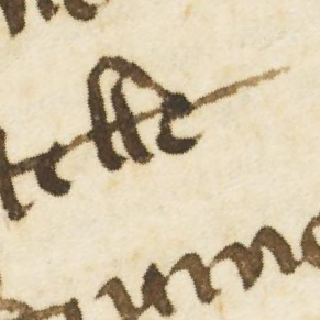

In [122]:
def resize(img, a):
    center_crop = lambda img, size: img.crop(box=[(img.width-size)/2, (img.width-size)/2, img.width -(img.width-size)/2, img.width - (img.width-size)/2])
    a = 1.1
    org = img.width
    resized = img
    if a > 1.0:
        resized = center_crop(img.resize((int(org*a),int(org*a))),org)
    else:
        resized = centr_crop(img, org * a).resize((org,org))
    return resized

T = img
T = T.rotate(20)
T = resize(T, 0.2)
# T = Image.fromarray(255 - np.array(T))
center_crop(T,320)

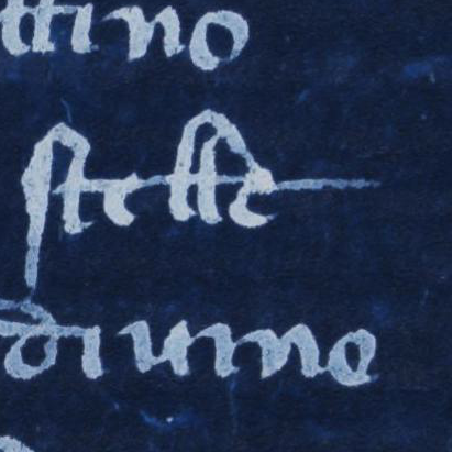

In [119]:
Image.fromarray(255 - np.array(T))
